<a href="https://colab.research.google.com/github/NikzadaShafi/Data-Proccessing/blob/main/DataProccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Proccessing - Assignment 5
#### <font color=darkblue> Mohammad Shafi Nikzada - 3754101 </font>
#### <font color=darkblue> Nils Jesper Cornelius - 3754102 </font>

### Link to GitHub
https://github.com/NikzadaShafi/Data-Proccessing/blob/main/DataProccessing.ipynb

In [5]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt

In [6]:
# Adult Census Income - Downloading the data
od.download("https://www.kaggle.com/datasets/uciml/adult-census-income")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shafinikzada
Your Kaggle Key: ··········


100%|██████████| 450k/450k [00:00<00:00, 65.5MB/s]

In [7]:
# The data is in CSV format, read the data using pandas library
data = pd.read_csv('adult-census-income/adult.csv')

# <font color=black> Data Exploration and visualization </font>

In [8]:
# Exploring the dataset
data.head(5)   # display the first 5 rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
data.info()  # display the basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data.describe()  # display the summary statistics of the dataset


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


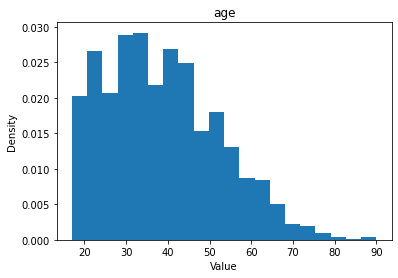

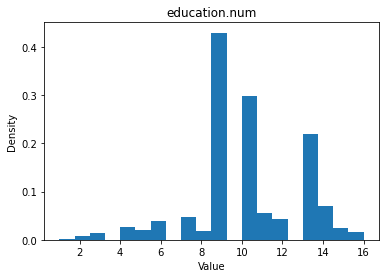

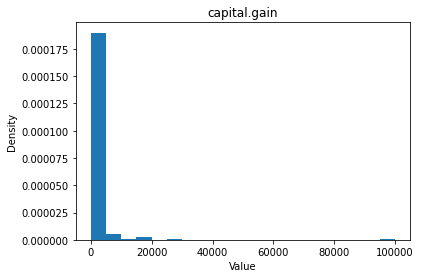

Feature: age
Mean: 38.58164675532078
Variance: 186.06140024880162
Feature: education.num
Mean: 10.0806793403151
Variance: 6.618889907032931
Feature: capital.gain
Mean: 1077.6488437087312
Variance: 54542539.17840537


In [12]:
# Features that we wnat to plot
features = ['age', 'education.num', 'capital.gain']

# Data distributions plot
for feature in features:
    plt.hist(data[feature], bins=20, density=True)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

# Mean and variance of the features
for feature in features:
    mean = data[feature].mean()
    variance = data[feature].var()
    print("Feature:", feature)
    print("Mean:", mean)
    print("Variance:", variance)

# <font color=black> Data Pre-processing </font>

In [13]:
# Replace "?" with NaN
data.replace("?", np.nan, inplace=True)
# Identify missing data
missing_data = data.isna()
# Count missing data
print("Missing data counts:")
print(missing_data.sum())

# Remove missing data
data_clean = data.dropna()




Missing data counts:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


## <font color=darkblue> • Justification for removing missing data </font>
Since there are only 2399 missing values out of 32561 rows in the dataset, removing the rows with missing data is a reasonable approach, as it is unlikely to have a significant impact on the analysis. Also, since the dataset is relatively large, removing these rows will not result in a significant loss of information or bias the analysis. However, in cases where the amount of missing data is much larger or the data is missing systematically, other approaches such as imputation may be more appropriate.

In [14]:
# Check the shape of data after cleaning
data_clean.shape

(30162, 15)

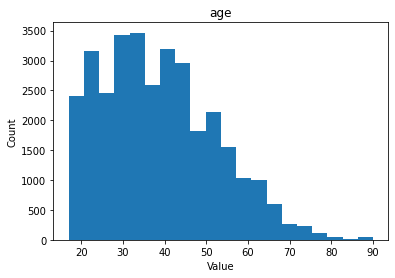

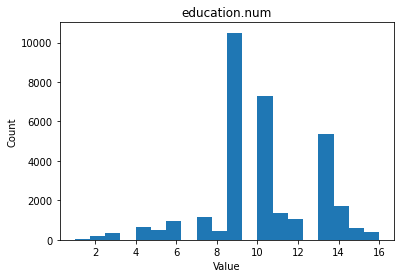

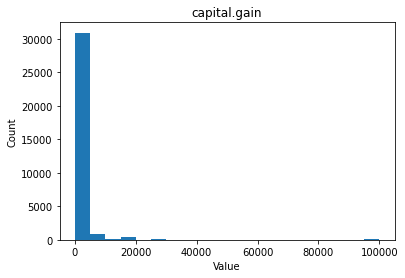

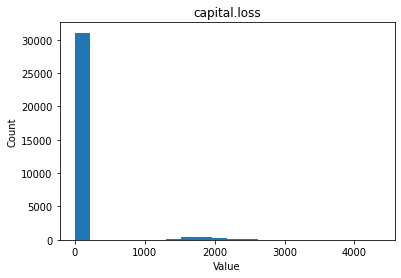

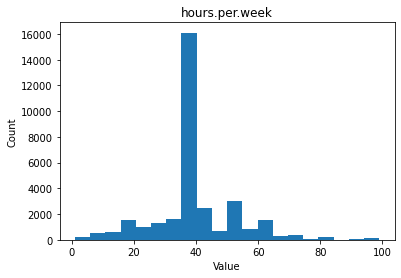

In [15]:
# Identify potential noise
# Plot the data distributions of selected features
features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for feature in features:
    plt.hist(data[feature], bins=20)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

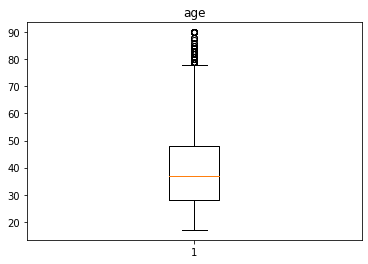

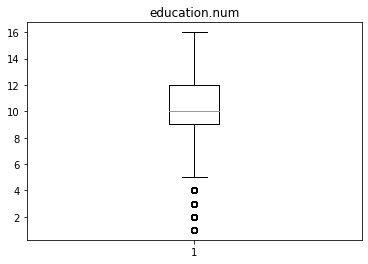

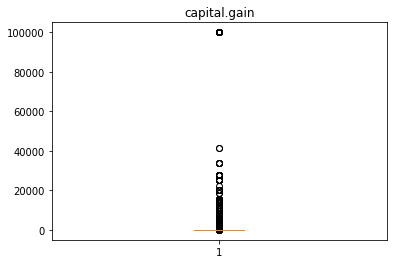

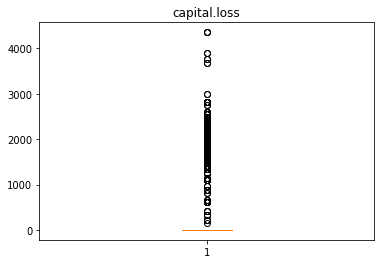

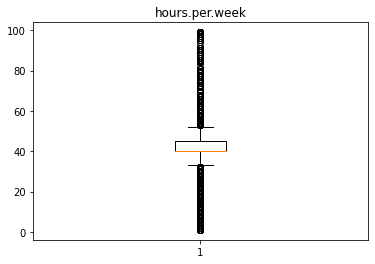

In [16]:
# Identify potential outliers in the numerical features using boxplots
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for feature in numerical_features:
    plt.boxplot(data[feature])
    plt.title(feature)
    plt.show()

# Handle noise
# Remove potential outliers in the numerical features using z-score method
z_scores = np.abs((data[numerical_features] - data[numerical_features].mean()) / data[numerical_features].std())
data_clean = data[(z_scores < 3).all(axis=1)]

## <font color=darkblue> • Justification for identifying and handling noise </font>
In the above code, we first plotted the data distributions of selected features and boxplots of numerical features to identify potential noise, such as outliers or unusual values. We can see that some features have highly skewed distributions and potential outliers. To handle noise, we used the z-score method to remove potential outliers from the numerical features. In this method, we calculate the z-score of each data point in each numerical feature, and remove any data point whose z-score is greater than 3, which is a common threshold for identifying outliers. This approach is just one example of how to handle noise and other approaches, such as imputation or data transformation, may be more appropriate depending on the nature of the noise and the research question. Overall, identifying and handling noise is important for ensuring the quality and reliability of the analysis results. It is important to use appropriate techniques and to justify the choice of these techniques based on the specific characteristics of the data and the research question.